In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

In [6]:
# Structuring the data based on the provided LaTeX table
data = {
    "Case": [
        "Overall (Human Eye Tracking)", "Overall (Human Eye Tracking)",
        "Viewer 1", "Viewer 2", "Viewer 3", "Viewer 4", "Viewer 5",
        "M1: IoU > 0.5, Single", "M1: IoU > 0.5, Single",
        "M2: IoU > 0.5, Average", "M2: IoU > 0.5, Average",
        "M1 (Overall Human vs Models)", "M1 (Overall Human vs Models)"
    ],
    "Metric": [
        "Acc.", "F1", "Acc.", "Acc.", "Acc.", "Acc.", "Acc.",
        "Acc.", "F1", "Acc.", "F1", "A.R.", "A.R."
    ],
    "Cat": [0.695, 0.820, 0.978, 0.982, 0.666, 0.613, 0.685, 0.986, 0.993, 0.981, 0.991, 0.691, 0.690],
    "Dog": [0.691, 0.817, 0.982, 0.984, 0.644, 0.634, 0.680, 0.987, 0.993, 0.977, 0.989, 0.686, 0.684],
    "Bicycle": [0.996, 0.998, 0.950, 0.980, 0.984, 0.979, 0.981, 0.980, 0.990, 0.962, 0.980, 0.977, 0.958],
    "Motorbike": [0.990, 0.995, 0.943, 0.933, 0.974, 0.967, 0.975, 0.984, 0.992, 0.976, 0.988, 0.978, 0.971],
    "Boat": [0.995, 0.998, 0.965, 0.936, 0.890, 0.986, 0.965, 0.959, 0.979, 0.924, 0.961, 0.955, 0.920],
    "Aero": [0.997, 0.998, 0.994, 0.969, 0.934, 0.989, 0.974, 0.992, 0.996, 0.968, 0.984, 0.992, 0.971],
    "Horse": [1.000, 1.000, 0.983, 0.991, 0.987, 0.971, 0.979, 0.992, 0.995, 0.983, 0.992, 0.991, 0.983],
    "Cow": [0.989, 0.995, 0.875, 0.983, 0.956, 0.849, 0.966, 0.983, 0.992, 0.963, 0.981, 0.980, 0.960],
    "Sofa": [0.976, 0.988, 0.942, 0.972, 0.872, 0.968, 0.923, 0.981, 0.990, 0.979, 0.989, 0.961, 0.959],
    "D.Table": [0.991, 0.996, 0.965, 0.985, 0.945, 0.982, 0.957, 0.984, 0.992, 0.951, 0.975, 0.976, 0.943],
    "Overall": [0.885, 0.939, 0.966, 0.974, 0.839, 0.845, 0.864, 0.983, 0.992, 0.969, 0.984, 0.873, 0.861]
}

# Creating a DataFrame for the data
df = pd.DataFrame(data)
df.head()

,Case,Metric,Cat,Dog,Bicycle,Motorbike,Boat,Aero,Horse,Cow,Sofa,D.Table,Overall
0,Overall (Human Eye Tracking),Acc.,0.695,0.691,0.996,0.990,0.995,0.997,1.000,0.989,0.976,0.991,0.885
1,Overall (Human Eye Tracking),F1,0.820,0.817,0.998,0.995,0.998,0.998,1.000,0.995,0.988,0.996,0.939
2,Viewer 1,Acc.,0.978,0.982,0.950,0.943,0.965,0.994,0.983,0.875,0.942,0.965,0.966
3,Viewer 2,Acc.,0.982,0.984,0.980,0.933,0.936,0.969,0.991,0.983,0.972,0.985,0.974
4,Viewer 3,Acc.,0.666,0.644,0.984,0.974,0.890,0.934,0.987,0.956,0.872,0.945,0.839


# Comparing accuracy and F1

#### Accuracy

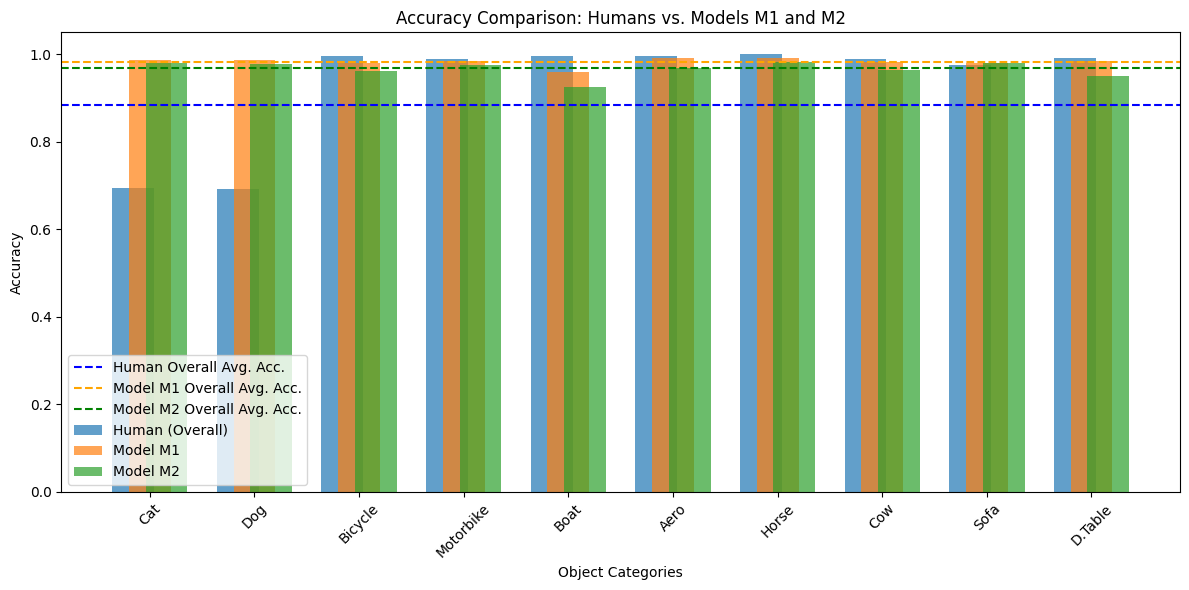

"\nHumans and models exhibit high accuracy across categories, but models (M1) show consistently higher scores in certain categories. \nFor instance, categories like 'Cat' and 'Dog' are areas where the human accuracy drops slightly, whereas models maintain high accuracy.\n\nKey insights include:\n1. The 'Horse' category is perfectly detected by both humans and models.\n2. Human performance variability in categories like 'Cow' and 'Sofa' suggests room for exploration into human error patterns.\n3. Models may benefit from less ambiguity in detecting non-animal objects, maintaining consistent accuracy.\n\nNext, I'll analyze individual viewer performance variability and F1 scores.\n"

In [7]:
# Separating human and model data for comparison
human_overall = df[df['Case'] == "Overall (Human Eye Tracking)"].iloc[0]  # Accuracy for human overall
model_m1 = df[df['Case'] == "M1: IoU > 0.5, Single"].iloc[0]  # Accuracy for M1
model_m2 = df[df['Case'] == "M2: IoU > 0.5, Average"].iloc[0] # Accuracy for M2
categories = df.columns[2:-1]  # Object categories

# Extracting metrics for plotting
human_acc = human_overall[categories]
model_acc = model_m1[categories]
modelm2_acc = model_m2[categories]

# Preparing overlap
bar_width = 0.4
offset = bar_width * 0.4
x = range(len(categories))


#### DO THE PLOTTING ####
# Plot each set of bars
plt.figure(figsize=(12, 6))
plt.bar(
    [pos - offset for pos in x], 
    human_acc, alpha=0.7, label='Human (Overall)', width=bar_width, align='center'
)
plt.bar(
    x, 
    model_acc, alpha=0.7, label='Model M1', width=bar_width, align='center'
)
plt.bar(
    [pos + offset for pos in x], 
    modelm2_acc, alpha=0.7, label='Model M2', width=bar_width, align='center'
)

# Add horizontal lines for overall averages
plt.axhline(human_overall['Overall'], color='blue', linestyle='--', label='Human Overall Avg. Acc.') 
plt.axhline(model_m1['Overall'], color='orange', linestyle='--', label='Model M1 Overall Avg. Acc.') # alpha=0.7
plt.axhline(model_m2['Overall'], color='green', linestyle='--', label='Model M2 Overall Avg. Acc.')

# Labels and title
plt.title('Accuracy Comparison: Humans vs. Models M1 and M2')
plt.ylabel('Accuracy')
plt.xlabel('Object Categories')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Tip and Explanation
reasoning = """
Humans and models exhibit high accuracy across categories, but models (M1) show consistently higher scores in certain categories. 
For instance, categories like 'Cat' and 'Dog' are areas where the human accuracy drops slightly, whereas models maintain high accuracy.

Key insights include:
1. The 'Horse' category is perfectly detected by both humans and models.
2. Human performance variability in categories like 'Cow' and 'Sofa' suggests room for exploration into human error patterns.
3. Models may benefit from less ambiguity in detecting non-animal objects, maintaining consistent accuracy.

Next, I'll analyze individual viewer performance variability and F1 scores.
"""

reasoning


#### F1

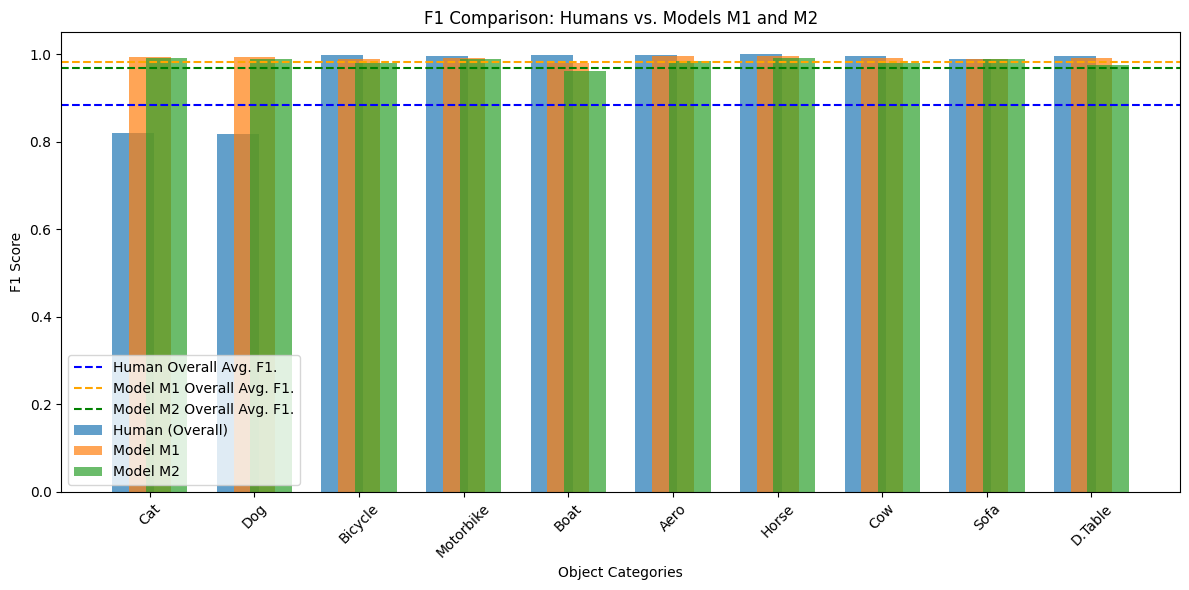

In [8]:
human_f1 = df[df['Case'] == "Overall (Human Eye Tracking)"].iloc[1]  # F1 for human overall
model_f1_m1 = df[df['Case'] == "M1: IoU > 0.5, Single"].iloc[1]  # F1 for M1
model_f1_m2 = df[df['Case'] == "M2: IoU > 0.5, Average"].iloc[1]  # F1 for M2
categories = df.columns[2:-1]
human_f1_metrics = human_f1[categories]
model_f1_m1_metrics = model_f1_m1[categories]
model_f1_m2_metrics = model_f1_m2[categories]

# Preparing overlap
bar_width = 0.4
offset = bar_width * 0.4
x = range(len(categories))

#### DO THE PLOTTING ####
# Plot each set of bars
plt.figure(figsize=(12, 6))
plt.bar(
    [pos - offset for pos in x], 
    human_f1_metrics, alpha=0.7, label='Human (Overall)', width=bar_width, align='center'
)
plt.bar(
    x, 
    model_f1_m1_metrics, alpha=0.7, label='Model M1', width=bar_width, align='center'
)
plt.bar(
    [pos + offset for pos in x], 
    model_f1_m2_metrics, alpha=0.7, label='Model M2', width=bar_width, align='center'
)

# Add horizontal lines for overall averages
plt.axhline(human_overall['Overall'], color='blue', linestyle='--', label='Human Overall Avg. F1.') 
plt.axhline(model_m1['Overall'], color='orange', linestyle='--', label='Model M1 Overall Avg. F1.') # alpha=0.7
plt.axhline(model_m2['Overall'], color='green', linestyle='--', label='Model M2 Overall Avg. F1.')

# Labels and title
plt.title('F1 Comparison: Humans vs. Models M1 and M2')
plt.ylabel('F1 Score')
plt.xlabel('Object Categories')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Viwers Comparison

<Figure size 1400x700 with 0 Axes>

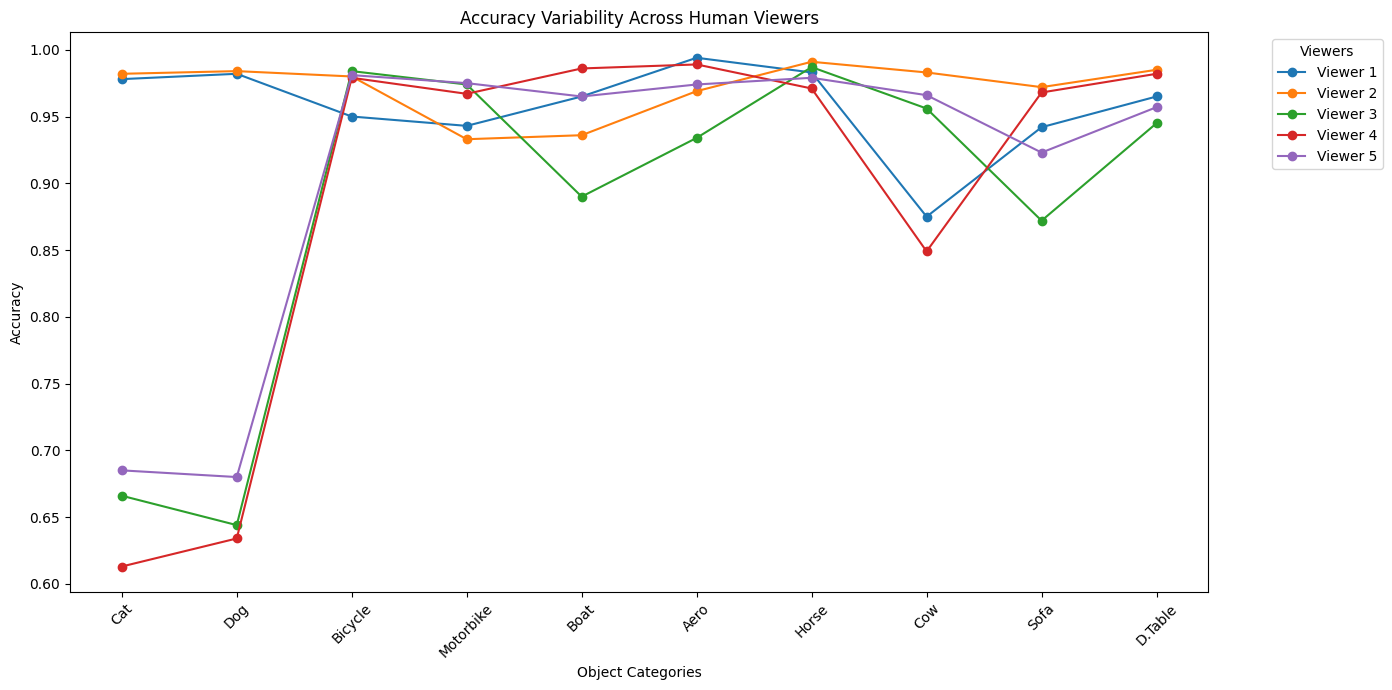

'\nIndividual human viewer performance varies significantly across categories. \nNotable insights:\n1. Viewers 3 and 4 exhibit lower accuracy across many categories, with sharp drops in "Cat" and "Dog".\n2. Viewer 1 performs consistently high across all categories, suggesting individual differences in detection ability.\n\nFurther investigation could explore:\n- Factors affecting viewer performance, such as attention patterns or experience.\n- Aggregated human metrics (e.g., averaging viewers\' performance) to minimize individual variability.\n\nNext, I\'ll analyze F1 scores to compare performance consistency between humans and models.\n'

In [11]:
# Extracting data for individual human viewers
human_viewers = df[df['Case'].str.contains("Viewer")]

# Visualizing variability in accuracy across viewers for all categories
viewer_data = human_viewers[categories].T  # Transpose for easier plotting
viewer_data.columns = human_viewers['Case']
categories = df.columns[2:-1]
x = range(len(categories))

plt.figure(figsize=(14, 7))
viewer_data.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Accuracy Variability Across Human Viewers')
plt.ylabel('Accuracy')
plt.xlabel('Object Categories')
plt.xticks(x, categories, rotation=45)
plt.legend(title='Viewers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tip and Explanation
reasoning = """
Individual human viewer performance varies significantly across categories. 
Notable insights:
1. Viewers 3 and 4 exhibit lower accuracy across many categories, with sharp drops in "Cat" and "Dog".
2. Viewer 1 performs consistently high across all categories, suggesting individual differences in detection ability.

Further investigation could explore:
- Factors affecting viewer performance, such as attention patterns or experience.
- Aggregated human metrics (e.g., averaging viewers' performance) to minimize individual variability.

Next, I'll analyze F1 scores to compare performance consistency between humans and models.
"""

reasoning


<Figure size 1400x700 with 0 Axes>

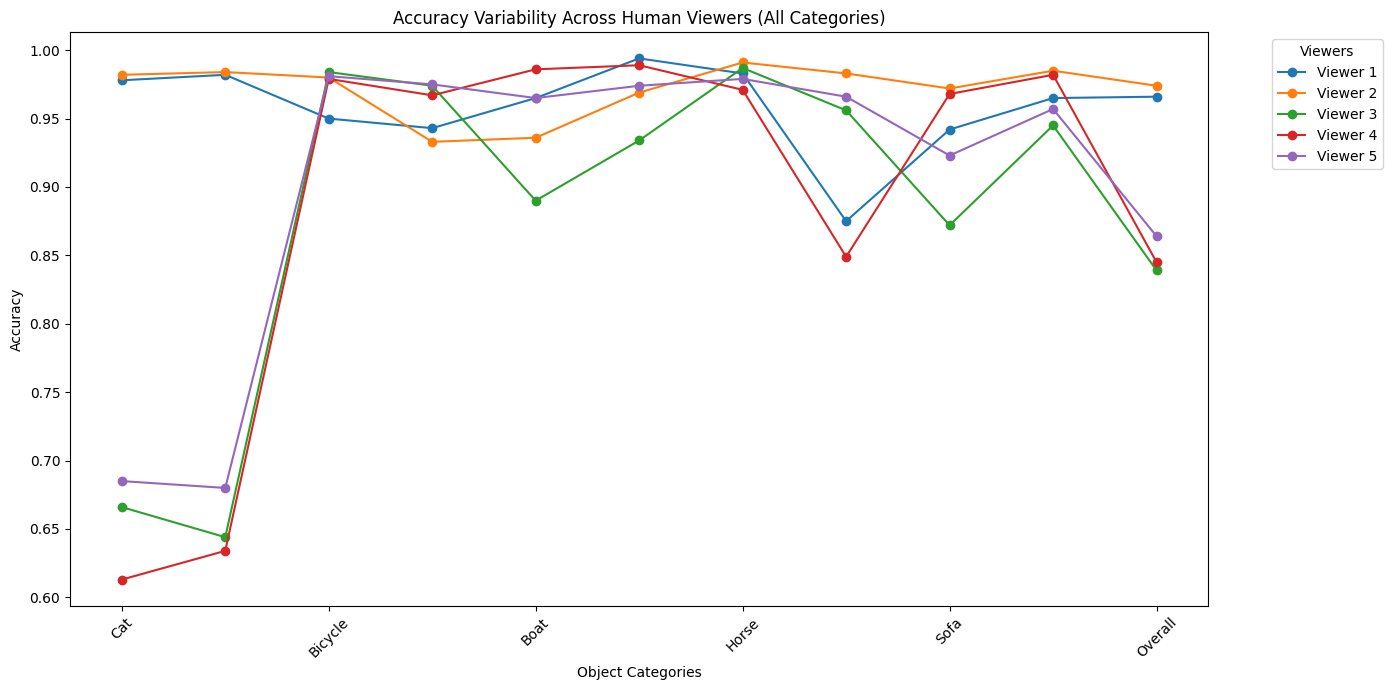

'\nAll object categories are included in this analysis of human viewer variability in accuracy:\n1. Viewers 3 and 4 exhibit lower accuracy across most categories, with pronounced dips in "Cat" and "Dog".\n2. Viewer 1 is consistently high-performing, indicating individual differences in detection capabilities.\n3. Category-specific challenges, such as "Sofa" and "Cow", are common across most viewers.\n\nFurther analysis could involve aggregating viewer performances or investigating patterns of agreement across viewers.\n'

In [10]:
# Reconstructing the human viewers' accuracy data
human_viewers_data = {
    "Case": ["Viewer 1", "Viewer 2", "Viewer 3", "Viewer 4", "Viewer 5"],
    "Cat": [0.978, 0.982, 0.666, 0.613, 0.685],
    "Dog": [0.982, 0.984, 0.644, 0.634, 0.680],
    "Bicycle": [0.950, 0.980, 0.984, 0.979, 0.981],
    "Motorbike": [0.943, 0.933, 0.974, 0.967, 0.975],
    "Boat": [0.965, 0.936, 0.890, 0.986, 0.965],
    "Aero": [0.994, 0.969, 0.934, 0.989, 0.974],
    "Horse": [0.983, 0.991, 0.987, 0.971, 0.979],
    "Cow": [0.875, 0.983, 0.956, 0.849, 0.966],
    "Sofa": [0.942, 0.972, 0.872, 0.968, 0.923],
    "D.Table": [0.965, 0.985, 0.945, 0.982, 0.957],
    "Overall": [0.966, 0.974, 0.839, 0.845, 0.864]
}

# Creating a DataFrame for human viewers' accuracy
human_viewers_df = pd.DataFrame(human_viewers_data).set_index("Case")

# Plotting variability in accuracy across viewers for all categories
plt.figure(figsize=(14, 7))
human_viewers_df.T.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Accuracy Variability Across Human Viewers (All Categories)')
plt.ylabel('Accuracy')
plt.xlabel('Object Categories')
plt.xticks(rotation=45)
plt.legend(title='Viewers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Explanation
reasoning = """
All object categories are included in this analysis of human viewer variability in accuracy:
1. Viewers 3 and 4 exhibit lower accuracy across most categories, with pronounced dips in "Cat" and "Dog".
2. Viewer 1 is consistently high-performing, indicating individual differences in detection capabilities.
3. Category-specific challenges, such as "Sofa" and "Cow", are common across most viewers.

Further analysis could involve aggregating viewer performances or investigating patterns of agreement across viewers.
"""
reasoning
